In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import compute_charge_dist as fz

import time

%matplotlib inline

echargeSI = 1.60217663e-19 # Coulomb
AAtom     = 1.0e-10

grain_type = "carbonaceous"
#grain_type = "silicate"

grain_size = 5
pcent      = 1

# Desktop
#save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

# Laptop
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "ChargeDist_CF_%sgrains_%iAA_.pkl"%(grain_type, grain_size)
#filename = "fz_%.3iAA_%s_CR_True.pkl"%(grain_size, grain_type) 
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_small = pickle.load(pkl_file)
pkl_file.close

########################################################################################
#grain_size = 50
grain_size = 100
#grain_type = "carbonaceous"

# Desktop
#save_dir = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh/ChargeDist"
#save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/CR"
#save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"

#filename = "ChargeDist_CF_%sgrains_%iAA.pkl"%(grain_type, grain_size)
#filename = "fz_%.3iAA_%s_CR_True.pkl"%(grain_size, grain_type) 
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file   = open("%s/%s"%(save_dir, filename), "rb")
cdist_int  = pickle.load(pkl_file)
pkl_file.close

########################################################################################
grain_size =  1000
#grain_type = "carbonaceous"

pcent = 0.1

# Desktop
#save_dir = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh/ChargeDist"
# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"
#save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "ChargeDist_CF_%sgrains_%iAA.pkl"%(grain_type, grain_size)
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_large = pickle.load(pkl_file)
pkl_file.close


<function close>

In [30]:
#dist = "small"
#cdist = cdist_small

#dist = "int"
#cdist = cdist_int

dist = "large"
cdist = cdist_large

In [31]:
too_high = np.where(cdist["nH"] > 2.0e4)

arrs = []

ii = 0
for key in cdist.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax" and key!="ZZ":
        #print(key)
        cdist[key] = np.delete(cdist[key], too_high)


In [32]:
Uavg = (cdist["zmean"]*echargeSI/(cdist["grain_size"]*AAtom)*8.99e9)

Saving the charge distribution figure for carbonaceous 1000 AA grain.


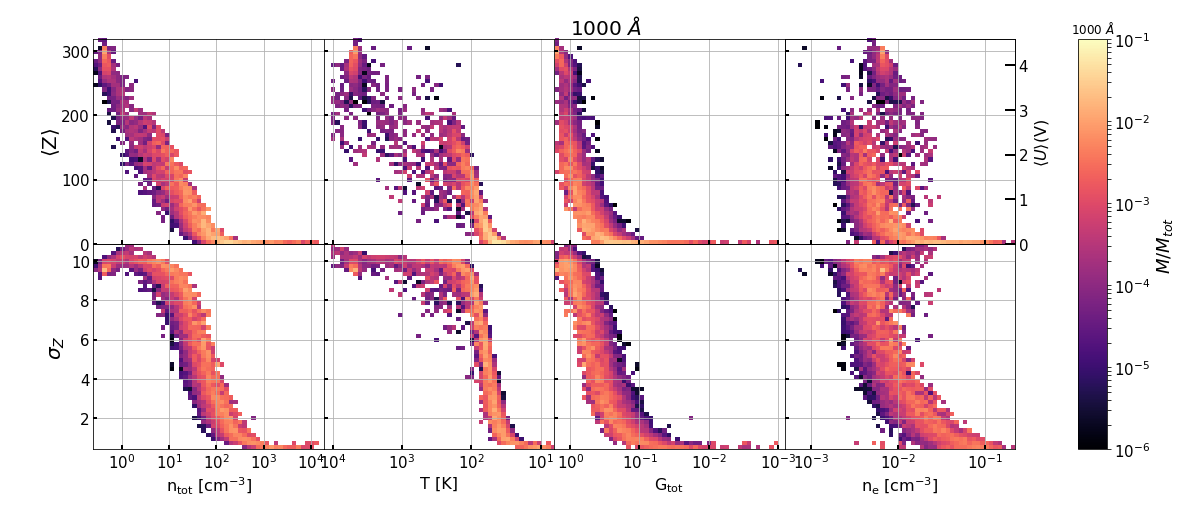

In [33]:
from matplotlib.ticker import MaxNLocator

xsize = 16
ysize = 6.7

nfigs_x = 4
nfigs_y = 2

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.09
wpad = 0.055

xs_panel = 0.8 / nfigs_x 
ys_panel = 0.85 / nfigs_y 

total_mass = np.sum(cdist["cell_mass"])

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    # find number of multiples of pi/2
    return "10$^{%i}$"%value


############################################################################################################
############################               n           #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), cdist["zstd"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("$\\sigma_{Z}$", fontsize=20)
ax.set_xlabel("n$_{\mathrm{tot}}$ [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.set_xlim(np.log10(np.min(cdist["nH"])),np.log10(np.max(cdist["nH"]))+0.1)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["nH"]), cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.set_ylabel("$\\langle$Z$\\rangle$", fontsize=20, labelpad=-1)
ax.set_xlim(np.log10(np.min(cdist["nH"])),np.log10(np.max(cdist["nH"]))+0.1)


############################################################################################################
############################                t          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), cdist["zstd"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("T [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"]))+0.1,np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 1


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.set_xlim([np.max(np.log10(cdist["temp"]))+0.1,np.min(np.log10(cdist["temp"]))])


############################################################################################################
############################               1000 Angstroms            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])


cax = ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), cdist["zstd"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("G$_{\\mathrm{tot}}$", fontsize=16)

ax.set_xlim([np.log10(1.7),np.min(np.log10(cdist["G"]+cdist["G_CR"]))-0.1])

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])


ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.set_xlim([np.log10(1.7),np.min(np.log10(cdist["G"]+cdist["G_CR"]))-0.1])

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["new_ne"]), cdist["zstd"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("n$_{\mathrm{e}}$ [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax.set_xlim([np.log10(np.min(cdist["new_ne"])*0.7),np.log10(np.max(cdist["new_ne"]))])

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["new_ne"]), cdist["zmean"], bins=50, norm=LogNorm(), cmap="magma", weights=cdist["cell_mass"]/total_mass, vmin=1.0e-6, vmax=1.0e-1)
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.set_xlim([np.log10(np.min(cdist["new_ne"])*0.7),np.log10(np.max(cdist["new_ne"]))])

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=15)

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=16)
ax1.set_ylim(np.min(Uavg), np.max(Uavg))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.91, 0.09, 0.025, 0.85])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
#cbar.set_ticks([])
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.99)

fig.show()

if dist == "small":
    print("Saving the charge distribution figure for %s 5 AA grain."%grain_type)
    plt.title("5 $\\AA$")
    #fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_4a_5AA_%s_Z_phasePlot.pdf"%grain_type, format="pdf")
    fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Figure_4a_5AA_%s_Z_phasePlot.pdf"%grain_type, format="pdf")
elif dist == "int":
    print("Saving the charge distribution figure for %s 100 AA grain."%grain_type)
    plt.title("100 $\\AA$")
    fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Figure_4a_100AA_%s_Z_phasePlot.pdf"%grain_type, format="pdf")

    #fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_4a_100AA_%s_Z_phasePlot.pdf"%grain_type, format="pdf")
elif dist == "large":
    print("Saving the charge distribution figure for %s 1000 AA grain."%grain_type)
    plt.title("1000 $\\AA$")
    #fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_4a_1000AA_%s_Z_phasePlot.pdf"%grain_type, format="pdf")
    fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Figure_4a_1000AA_%s_Z_phasePlot.pdf"%grain_type, format="pdf")


#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_3_50AA_Carbonaceous.pdf", format="pdf")


In [17]:
print("Done")

Done


---

---

---

---

---

---